# Data Exploration and Model Training Notebook

This notebook walks through loading, exploring, and preprocessing a news dataset, training a classification model to detect real vs fake news, and evaluating the model's performance.

---

## 1. Importing Necessary Libraries

We start by importing the libraries for data manipulation, visualization, and machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

## 2. Loading the Dataset

Let's load the processed dataset and preview the first few rows to understand its structure.

In [2]:
df_data = pd.read_csv('../data/processed/processed_data.csv')
df_data.head()

,text,label
0,donald trump s kids may support him in spirit ...,0
1,seoul reuters north korea s latest defector a...,1
2,during a meeting of the welsh members of the p...,0
3,washington reuters us president donald trump ...,1
4,dubai reuters the radio station of yemen s ho...,1


## 3. Checking Dataset Dimensions

This provides the number of rows and columns, giving us an idea of the dataset's size.

In [3]:
df_data.shape

(43551, 2)

## 4. Converting Data to a Numpy Array (Optional)

Convert the dataset into a Numpy array format if needed for certain analyses or manipulations.

In [4]:
data_array = df_data.values
data_array[:5]

array([['donald trump s kids may support him in spirit and terrible tweets but they won t be going out to vote for him in the new york primary ivanka and eric trump both failed to register as republicans in time to do so according to trump this is because new york s primary registration rules were unfair after all the cutoff was in october and at that point people   including apparently his own kids   still sort of expected trump to have dropped out by nowon cnn ivanka claimed new york s voting regulations are  onerous new york has one of the most onerous rules in terms of registration and it required us to register a long time ago almost   close to a year ago and we didn t do that we found out about it sort of after the fact to which the millions of disenfranchised democratic voters who have watched  voter id  laws sweep the country responded by playing the world s smallest violintrump himself told his supporters that ivanka and eric feel very very guilty  adding  they feel very guilt

## 5. Displaying Dataset Information

Use `info()` to check data types and identify any columns with missing values.

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43551 entries, 0 to 43550
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    43471 non-null  object
 1   label   43551 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 680.6+ KB


## 6. Checking for Missing Values and Summary Statistics

Check for missing values and display summary statistics for numerical columns.

In [6]:
missing_values = df_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

df_data.describe()

Missing values in each column:
 text     80
label     0
dtype: int64


,label
count,43551.000000
mean,0.476820
std,0.499468
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


## 7. Exploring Text Lengths

Analyze the length of each news article by adding a `text_length` column and plot the distribution.

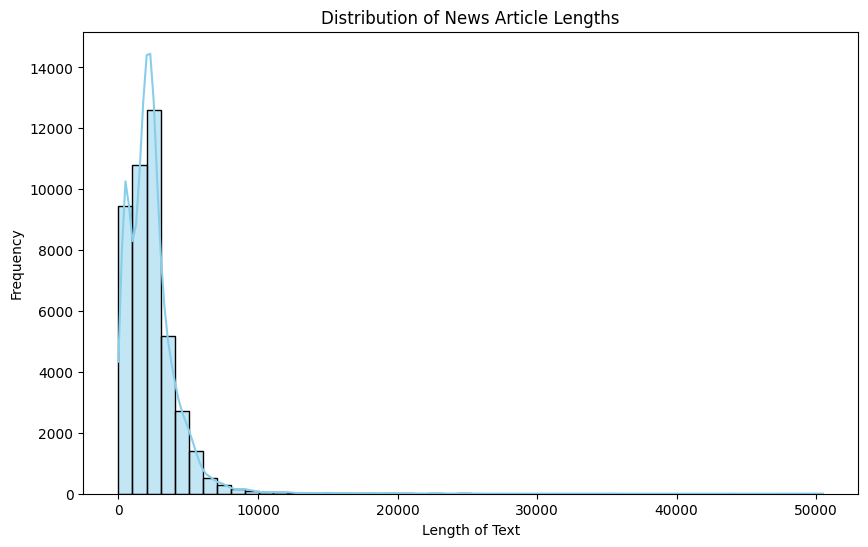

In [8]:
# Convert the 'text' column to strings and replace NaN with an empty string
df_data['text'] = df_data['text'].fillna('').astype(str)

# Add a new column for text length
df_data['text_length'] = df_data['text'].apply(len)

# Plot the distribution of article lengths
plt.figure(figsize=(10, 6))
sns.histplot(df_data['text_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of News Article Lengths')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.show()

## 8. Checking Label Distribution

Check the distribution of labels to see if there’s an imbalance between real and fake news articles.

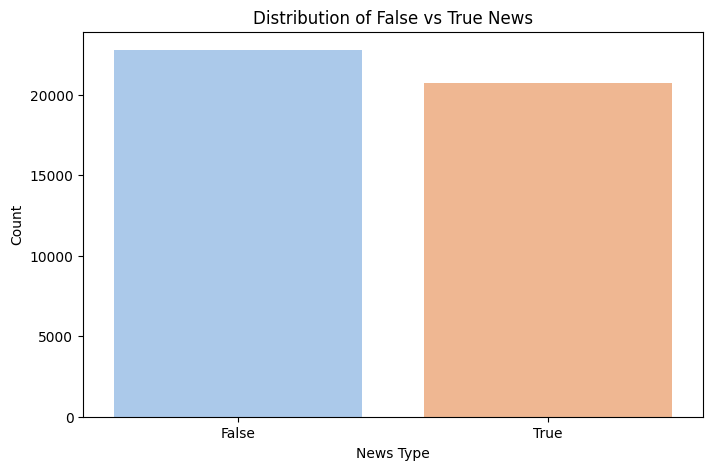

In [9]:
df_data['label'] = df_data['label'].map({0: 'False', 1: 'True'})
plt.figure(figsize=(8, 5))
sns.countplot(x='label', hue='label', data=df_data, palette='pastel', dodge=False, legend=False)
plt.title('Distribution of False vs True News')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()

## 9. Top 5 Most Frequent Words

Identify the most common words across the articles, which can indicate themes or biases.

In [12]:
vectorizer = CountVectorizer(stop_words='english', max_features=5)
word_matrix = vectorizer.fit_transform(df_data['text'])
word_freq = np.array(word_matrix.sum(axis=0)).flatten()
word_freq_df = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'frequency': word_freq})
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)
print("Top 5 most frequent words in the dataset:")
print(word_freq_df)

Top 5 most frequent words in the dataset:
        word  frequency
0       said     126143
1      trump     113017
2  president      49594
3     people      39820
4      state      30353
